In [2]:
%pip install statsmodels
import numpy as np
import pandas as pd
import statsmodels.api as sm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\python.exe -m pip install --upgrade pip' command.


In [4]:
df = pd.read_csv('spotify-2023.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
df['artist(s)_name'] = df['artist(s)_name'].astype('category')
df['track_name'] = df['track_name'].astype('category')
df['released_month'] = df['released_month'].astype(str).astype('category')
df['released_year'] = df['released_year'].astype(str).astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   track_name            953 non-null    category
 1   artist(s)_name        953 non-null    category
 2   artist_count          953 non-null    int64   
 3   released_year         953 non-null    category
 4   released_month        953 non-null    category
 5   released_day          953 non-null    int64   
 6   in_spotify_playlists  953 non-null    int64   
 7   in_spotify_charts     953 non-null    int64   
 8   streams               953 non-null    object  
 9   in_apple_playlists    953 non-null    int64   
 10  in_apple_charts       953 non-null    int64   
 11  in_deezer_playlists   953 non-null    object  
 12  in_deezer_charts      953 non-null    int64   
 13  in_shazam_charts      903 non-null    object  
 14  bpm                   953 non-null    int64   
 15  key   

In [13]:
counts = df['artist(s)_name'].nunique()
artistCounts = str(counts)
print('Count of Unique Artists is: ' + artistCounts)

Count of Unique Artists is: 645


In [14]:
df.describe()

,artist_count,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [18]:
print('Track Count by Year')
df.groupby('released_year')['track_name'].count()

Track Count by Year


released_year
1930      1
1942      1
1946      1
1950      1
1952      1
1957      2
1958      3
1959      2
1963      3
1968      1
1970      2
1971      1
1973      1
1975      2
1979      1
1982      2
1983      1
1984      4
1985      2
1986      2
1987      1
1991      2
1992      1
1994      1
1995      2
1996      1
1997      1
1998      1
1999      5
2000      4
2002      6
2003      2
2004      4
2005      1
2007      1
2008      2
2010      7
2011     10
2012     10
2013     13
2014     13
2015     11
2016     18
2017     23
2018     10
2019     36
2020     37
2021    119
2022    402
2023    175
Name: track_name, dtype: int64

In [19]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\python.exe -m pip install --upgrade pip' command.


The first chart shows that the most poplular songs are between 100 and 150 BPM
The second chart shows that tempo is not a good indicator of popularity
The third chart shows that there is not a strong correlation between tempo and Spotify chart position
The P = 0.348 is greater than 0.05, so we fail to reject the null hypothesis that there is no relationship between the popularity of a song and the BPM of the song
The P = 0.315 is greater than 0.05, so we fail to reject the null hypothesis that there is no relationship between the chart position of a song and the BPM of the song.
The R-squared value is 0.000, which means that the model does not explain the variance in the data.
                            OLS Regression Results                            
Dep. Variable:                    bpm   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.780

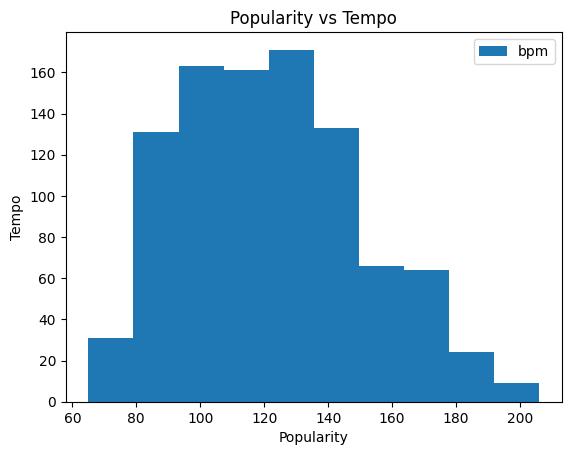

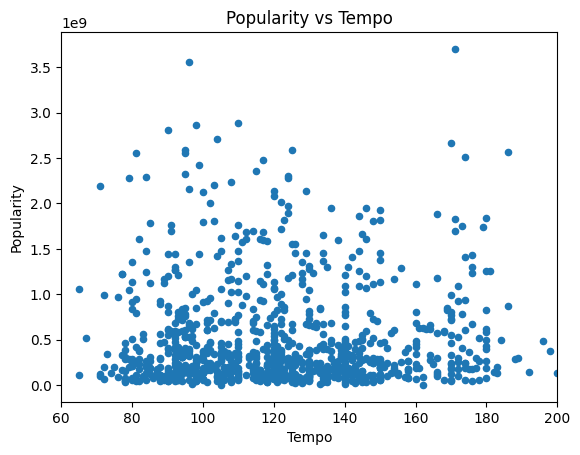

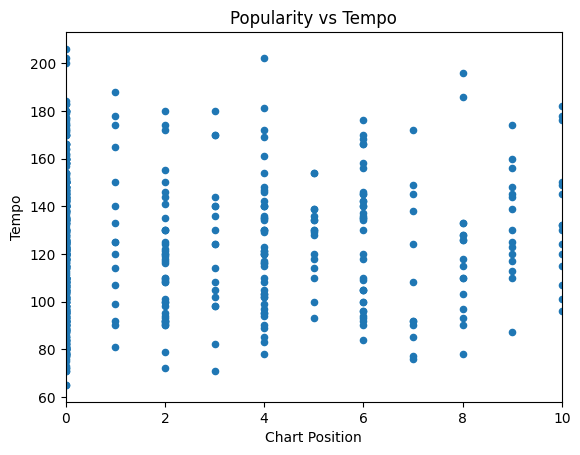

In [ ]:
#Resarch Question 
#How dose he popularity of a song relate to the BPM of the song?
#Is there a correlation between the popularity of a song and the BPM of the song?
#Is there a correlation between BPM Speed and Spoitfy Chart Position?

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('spotify-2023.csv')


print('The first chart shows that the most poplular songs are between 100 and 150 BPM')
ax = df.plot(kind='hist', x='streams', y='bpm')

ax.set_xlabel("Popularity")
ax.set_ylabel('Tempo')
ax.set_title('Popularity vs Tempo')

print('The second chart shows that tempo is not a good indicator of popularity')
ax2 = df.plot(kind='scatter', x='bpm', y='streams')
plt.xlim(60, 200)

ax2.set_xlabel("Tempo")
ax2.set_ylabel('Popularity')
ax2.set_title('Popularity vs Tempo')

print('The third chart shows that there is not a strong correlation between tempo and Spotify chart position')
ax3 = df.plot(kind='scatter', x='in_spotify_charts', y='bpm')
plt.xlim(0, 10)

ax3.set_xlabel("Chart Position")
ax3.set_ylabel('Tempo')
ax3.set_title('Popularity vs Tempo')

#Regression Analysis
print('The P = 0.348 is greater than 0.05, so we fail to reject the null hypothesis that there is no relationship between the popularity of a song and the tempo of the song')
print('The P = 0.315 is greater than 0.05, so we fail to reject the null hypothesis that there is no relationship between the chart position of a song and the tempo of the song.')
print('The R-squared value is 0.000, which means that the model does not explain the variance in the data.')

print('In conclusion, there is no relationship between the popularity of a song and the tempo of the song.')
print('There is no relationship between the chart position of a song and the tempo of the song.')
print('The model does not explain the variance in the data.')
print("what we do know is that the most popular songs are between 100 and 150 BPM")

df_clean = df.dropna()
x = df_clean[['streams', 'in_spotify_charts']]
x = sm.add_constant(x)
y = df_clean['bpm']
model = sm.OLS(y, x).fit()
print(model.summary())